# 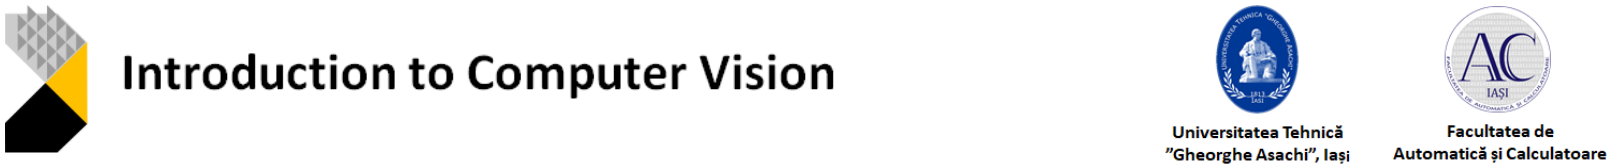

  The Intro to Computer Vision labs will be run in Google Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

Step 1: click on the assignment invite link -> **Accept this assignment**. Refresh page -> individual repo for the specific assignment is created automatically

Step 2: Navigate to http://colab.research.google.com/github -> Click the **Include Private Repos** checkbox -> **select the correct repo** (SistemeDeVedereArtificiala/assignment_name-student_name) -> Click on the jupyter notebook of the current assignment

Step 3: [GitHub sign-in window] In the popup window, sign-in to your Github account and authorize Colab to read the private files.

Step 4: [in colab] **File** -> **Save a copy to GitHub**. Select the correct repository for the SPECIFIC assignment -> Click the **Include Colab Link** -> Click **OK**

Step 5: [in colab] Navigate to the **Runtime** tab --> **Change runtime type**, under **Hardware accelerator** select **GPU/TPU** (tensor processing unit) according to your needs.
  
  <font color='red'>Read the suggestions and accomplish all tasks marked with **#TODO**.

!!! At the end of each laboratory **REPEAT step 4 in order to SAVE** the answers to your private repository (individual for each assignment)</font>

# Project 1: Lane Detection

  In the field of Computer Vision, extraction of geometric features from images is a common problem. Different approaches have been proven to be efficient in extracting particular features as part of the solution. Some solutions involve global examination of the input image, while others involve local examination at pixel level. A basic feature of any self-driving system is **Lane Detection.**


## Week 1: edge detection

**Canny edge detector:**
1. This is probably the most widely used edge detector in computer vision
2. Theoretical model: step‐edges corrupted by additive Gaussian noise
3. Canny has shown that the first derivative of the Gaussian closely approximates the operator that optimizes the product of signal‐to‐noise ratio and localization

###Our first Computer Vision pipeline:
1.   Filter image with derivative of Gaussian
```
kernel_size = 5 # Must be an odd number (3, 5, 7...)
smoothed_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
```
2.   Find magnitude and orientation of gradient
3.   Non-maximum suppression
4.   Linking and thresholding (hysteresis): define two thresholds, low and high,
use the high threshold to start edge curves and the low threshold to continue them
```
low_threshold = 180
high_threshold = 240
canny_img = cv2.Canny(smoothed_img, low_threshold, high_threshold)
```

In [ ]:
#TODO: test Canny demo
#go to http://bigwww.epfl.ch/demo/ip/demos/edgeDetector/ and upload image at https://drive.google.com/file/d/10L7JOrI1-Jvp6lQ7w5tlFKF8g9hR_MNL/view?usp=share_link

Include in this text cell all intermediate results (as images): Step 1 to Step 4 and the input image with the overlay result (use "Insert Image" from the text cell menu)

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2

In [ ]:
#TODO: add image at https://drive.google.com/file/d/10L7JOrI1-Jvp6lQ7w5tlFKF8g9hR_MNL/view?usp=share_link to My Drive

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
# check for test image
!ls "/content/drive/My Drive/SVA/images/um_000093.png"

'/content/drive/My Drive/SVA/images/um_000093.png'


In [ ]:
#documentation/help for a function can be shown with "??"
??cv2.imread

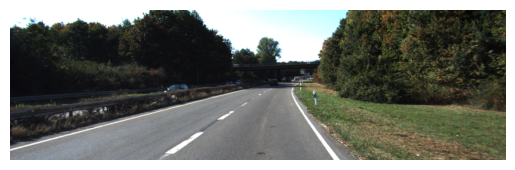

In [7]:
#TODO: read test image - see cv2.imread
image_bgr = cv2.imread("/content/drive/My Drive/SVA/images/um_000093.png")

#TODO: BGR to RGB - see cv2.cvtColor
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#TODO: print out input image - see plt.imshow from matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html
plt.imshow(image_rgb)
plt.axis("off")  # Hide the axis ticks
plt.show()


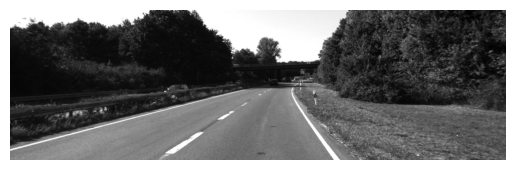

In [12]:
#TODO: apply the grayscale transform - see cv2.cvtColor
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.axis("off")
plt.show()


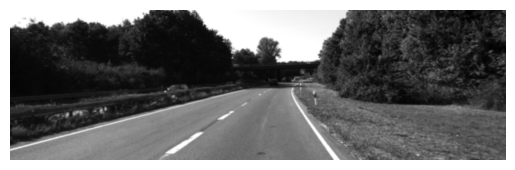

In [17]:
# Gaussian Smoothing

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)

#TODO: apply Gaussian Smoothing - see cv2.GaussianBlur
image_blur = cv2.GaussianBlur(image_gray, (kernel_size, kernel_size), 0)

#TODO: print smoothed grayscale image - see plt.imshow
plt.imshow(image_blur, cmap='gray')
plt.axis("off")
plt.show()

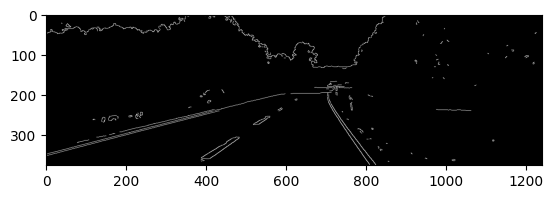

In [19]:
# Canny Edge Detection

# Define parameters for Canny
low_threshold = 180
high_threshold = 240

#TODO: apply Canny - see cv2.Canny
image_edges = cv2.Canny(image_blur, low_threshold, high_threshold)

#TODO: print Canny edges - see plt.imshow
plt.imshow(image_edges, cmap='gray')
plt.show()

###Region of interest:
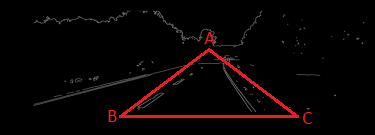
1.   Define the mask for a lane
* Vertices (empirically chosen triangle adjusted to the size of the image)
```
rows, cols = image.shape[:2]
  A =
  B =
  C =
vertices = np.array([[A, B, C]], dtype=np.int32)
```
* Mask
```
#defining a blank mask to start with - see np.zeros_like
mask =
ignore_mask_color = 255
#filling pixels inside the polygon defined by "vertices" with the fill color - see cv2.fillPoly  
```
2.   Apply mask - see cv2.bitwise_and
```
masked_image =
```



In [ ]:
??np.zeros_like

In [ ]:
??cv2.fillPoly

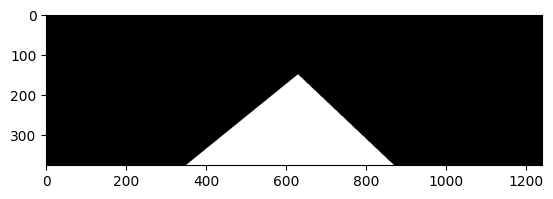

In [49]:
# Region of Interest

#TODO: define vertices (empirically chosen triangle adjusted to the size of the image)
#code here
rows, cols = image_edges.shape[:2]
A = [630,150]
B = [350,376]
C = [870,376]
vertices = np.array([[A, B, C]], dtype=np.int32)

#TODO: create the mask - see cv2.fillPoly
#code here
# defining a mask to start with
mask = np.zeros_like(image_edges)
ignore_mask_color = 255

# filling pixels inside the polygon defined by "vertices" with the fill color
cv2.fillPoly(mask, [vertices], ignore_mask_color)

#TODO: print mask
plt.imshow(mask, cmap='gray')
plt.show()


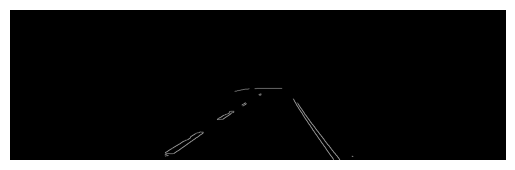

In [50]:
#TODO: Apply the mask to Canny edges - see cv2.bitwise_and
masked_edges = cv2.bitwise_and(image_edges, mask)

#TODO: print masked Canny edges - see plt.imshow
plt.imshow(masked_edges, cmap='gray')
plt.axis("off")
plt.show()


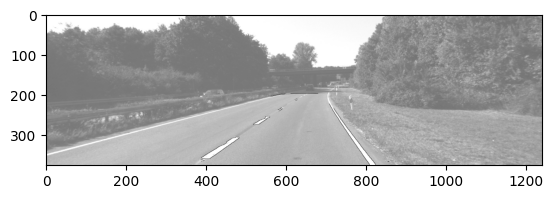

In [51]:
#overlap grayscale image and edges

#inverse the masked edges (edge in black, everything else white)
inverted_edges = cv2.bitwise_not(masked_edges)

#overlap to initial grayscale image - see cv2.addWeighted
edges_over_gray = cv2.addWeighted(image_gray, 0.5, inverted_edges, 0.5, 0)

#print overlapped image
plt.imshow(edges_over_gray, cmap='gray')

In [57]:
#TODO: define the following steps as functions

# 1. grayscale transform
def grayscale(image):
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  return gray

# 2. gaussian blur and canny edge detector
def blur_and_canny(gray, kernel_size, low_threshold, high_threshold):
  blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
  canny_edges = cv2.Canny(blur, low_threshold, high_threshold)
  return canny_edges

# 3. Region of Interest (ROI): define vertices, create the mask, apply the mask to Canny edges
def ROI(img, a, initial_img, b, c):
  #code here

  # defining a blank mask to start with
  A = [630,150]
  B = [350,376]
  C = [870,376]
  vertices = np.array([[A, B, C]], dtype=np.int32)
  mask = np.zeros_like(image_edges)
  ignore_mask_color = 255

  # filling pixels inside the polygon defined by "vertices" with the fill color
  cv2.fillPoly(mask, [vertices], ignore_mask_color)

  #apply the mask to Canny edges
  masked_edges = cv2.bitwise_and(image_edges, mask)

  #inverse the edges within the defined mask (edge in black, everything else white)
  inverted_edges = cv2.bitwise_not(masked_edges)

  #overlap the inversed edges within the defined mask with the grayscale
  edges_over_gray = cv2.addWeighted(image_gray, a, inverted_edges, b, 0)
  return edges_over_gray

In [59]:
#our pipeline as a function
def our_pipeline(image):

    #Grayscale
    gray_img = grayscale(image)

    #blur & Canny Edge Detection
    kernel_size = 5 # Must be an odd number (3, 5, 7...)
    st_threshold = 180
    nd_threshold = 240
    canny_img = blur_and_canny(gray_img, kernel_size, st_threshold, nd_threshold)

    #params for transparency
    a = 0.6
    b = 0.4
    c = 0.0
    #inverse the masked edges (edge in black, everything else white)
    output = ROI(canny_img, a, gray_img, b, c)

    return output

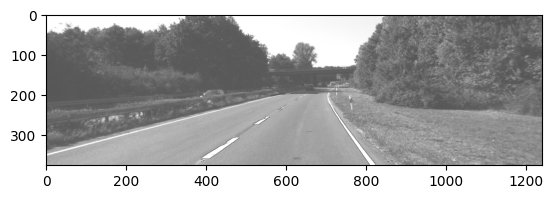

In [60]:
#TODO: apply pipeline to image at https://drive.google.com/file/d/1gzKYc4ESxCvHxxefMMHENQVmlEFCkQLi/view?usp=sharing
#TODO: read in test image - see cv2.imread
image_bgr = cv2.imread("/content/drive/My Drive/SVA/images/um_000093.png")

#TODO: BGR to RGB - see cv2.cvtColor
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#TODO: apply our_pipeline
result = our_pipeline(image_rgb)

#TODO: print image - see plt.imshow
plt.imshow(result, cmap='gray')